In [2]:
!pip install climate_library cartopy xarray  > /dev/null
!pip install climate-indices xclim > /dev/null

In [3]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf
import dask
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


from climate_library.climate_index import ClimateIndex
from scipy.io import netcdf
import xclim
import xclim.indices

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Time series of Kenya region, using latitude and longitude slice to get the coordinates**

In [5]:
#Load data
Prec = xr.open_dataset(r"/content/drive/My Drive/Ester AIMS/AIMS project/era5_tp.nc")
# ds1

In [6]:
#Slicing using the latitude and longitudede to get Kenya region
Prec=Prec.sel(longitude=slice(33,42),latitude=slice(5,-5))

#Converting m to mm
Prec = Prec['tp'] *1000

In [7]:
# Descriptive statistics
mean = Prec.mean().values
std_dev = Prec.std().values
minimum = Prec.min().values
percentile_25 = np.percentile(Prec,25)
median = Prec.median().values
percentile_75 = np.percentile(Prec, 75)
maximum = Prec.max().values

# Print the results
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Minimum:", minimum)
print("25th Percentile:", percentile_25)
print("Median:", median)
print("75th Percentile:", percentile_75)
print("Maximum:", maximum)



Mean: 2.1947358
Standard Deviation: 3.1829564571380615
Minimum: -7.450580596923828e-06
25th Percentile: 0.24091452360153198
Median: 1.0977685451507568
75th Percentile: 3.0273942947387695
Maximum: 125.79615783691406


In [8]:
# Convert latitude from degrees to radians, then take the cosine to adjust dataset values
weights = np.cos(np.deg2rad(Prec.latitude))
weights.name = "weights"

# Apply the calculated weights to the dataset
Prec_weighted = Prec.weighted(weights)

#weighted mean
Prec_mean = Prec_weighted.mean(["longitude", "latitude"])

Text(0.5, 1.0, 'Precipitation Time series over the years')

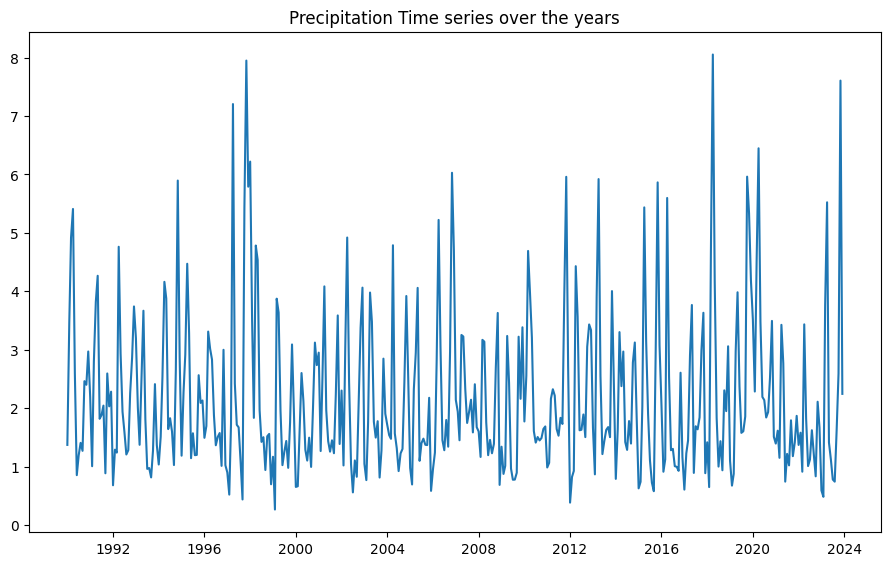

In [9]:
# Create a figure for the plot
fig, ax = plt.subplots(1, 1, figsize = (11, 6.5))

# Time coordinates and corresponding data values
x = Prec_mean['time']
y = Prec_mean
plt.plot(x,y)

# Set the title of the plot
plt.title('Precipitation Time series over the years')

In [10]:
# weighted mean and std time series data grouped by years
Prec_yearly = Prec_mean.groupby('time.year').mean()
std = Prec_mean.groupby('time.year').std()

Text(0.5, 1.0, 'Yearly average time series for Precipitation')

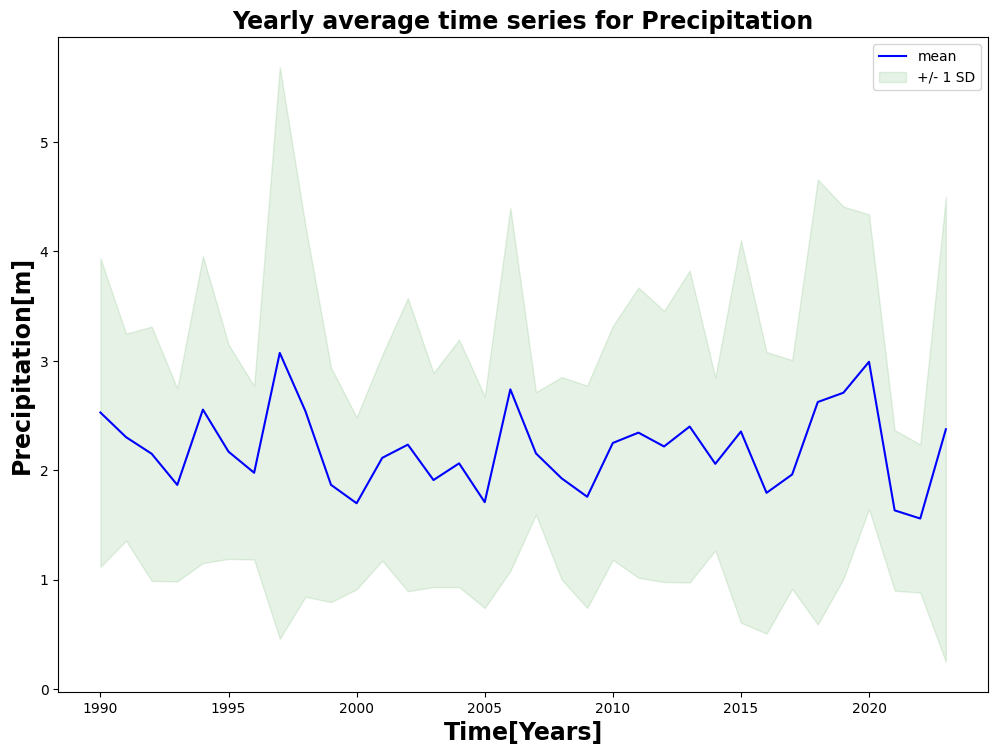

In [11]:
# Create figure and axis object for the plot
fig, ax = plt.subplots(1, 1, figsize = (12, 8.5))

# Yearly average precipitation time series plot
ax.plot(Prec_yearly.year, Prec_yearly, color='blue', label='mean')

# Fill the area between the mean plus or minus standard deviation
ax.fill_between(Prec_yearly.year, (Prec_yearly + std), (Prec_yearly - std), alpha=0.1, color='green', label='+/- 1 SD')

# Set the x-axis label and the y-axis label
ax.set_xlabel('Time[Years]', fontweight='bold',  fontsize='17', horizontalalignment='center')
ax.set_ylabel('Precipitation[m]', fontweight='bold', fontsize='17')
plt.legend()

# Set title of the plot
plt.title('Yearly average time series for Precipitation', fontweight='bold', fontsize='17')

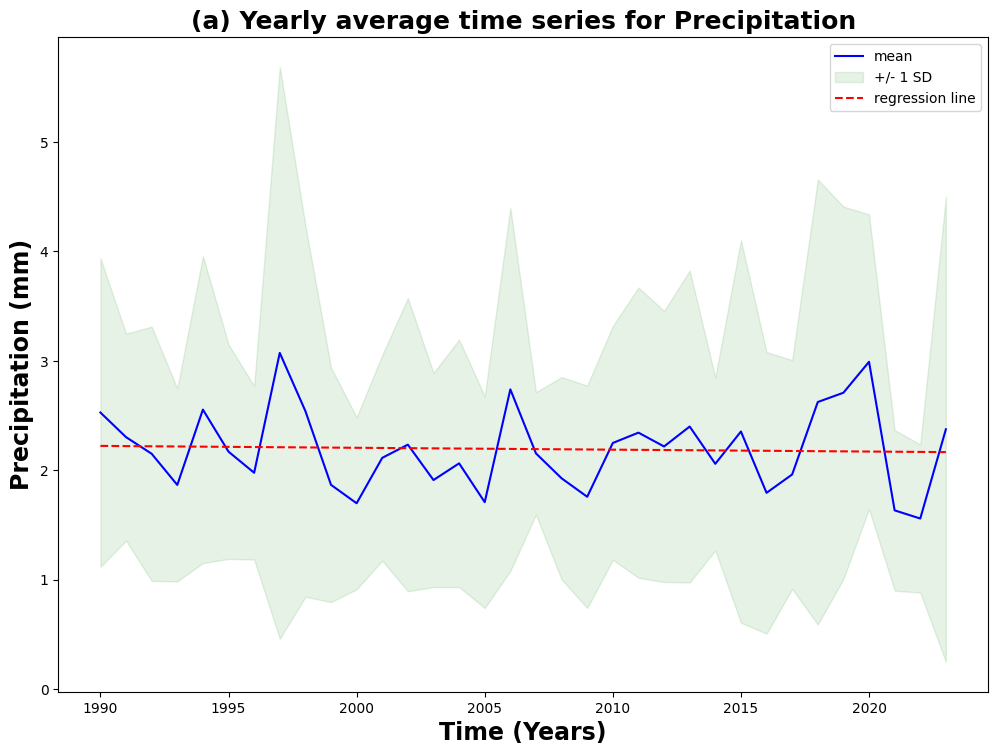

In [12]:
# Calculate regression line
slope, intercept = np.polyfit(Prec_yearly.year, Prec_yearly, 1)
regression_line = slope * Prec_yearly.year + intercept

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8.5))

# Plot the data
ax.plot(Prec_yearly.year, Prec_yearly, color='blue', label='mean')
ax.fill_between(Prec_yearly.year, (Prec_yearly + std), (Prec_yearly - std), alpha=0.1, color='green', label='+/- 1 SD')

# Plot the regression line
ax.plot(Prec_yearly.year, regression_line, color='red', linestyle='--', label='regression line')

# Set labels and title
ax.set_xlabel('Time (Years)', fontweight='bold', fontsize=17, horizontalalignment='center')
ax.set_ylabel('Precipitation (mm)', fontweight='bold', fontsize=17)
ax.set_title('(a) Yearly average time series for Precipitation', fontweight='bold', fontsize='18')
# Add legend
ax.legend()

plt.show()


Text(0.5, 1.0, 'Monthly climatologogy of total precipitation (1991-2023)')

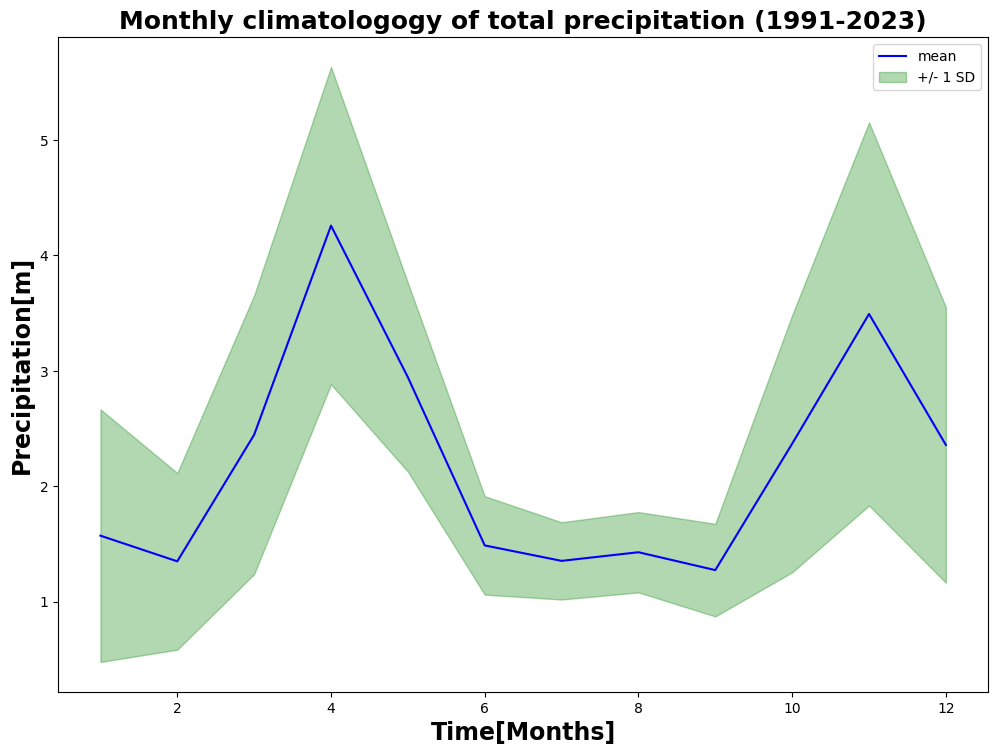

In [13]:
#weighted mean precipitation data grouped by month
month = Prec_mean.groupby('time.month').mean()
std = Prec_mean.groupby('time.month').std()

#Create figure
fig, ax = plt.subplots(1, 1, figsize = (12, 8.5))

# Plot the monthly mean precipitation data
ax.plot(month.month, month, color='blue', label='mean')

# Fill the area between the mean or minus plus standard deviation
ax.fill_between(month.month, (month + std), (month - std), alpha=0.3, color='green', label='+/- 1 SD')

# Set the x-axis and y-axis label
ax.set_xlabel('Time[Months]', fontweight='bold',  fontsize='17', horizontalalignment='center')
ax.set_ylabel('Precipitation[m]', fontweight='bold', fontsize='17')
ax.legend()

#Set title
plt.title('Monthly climatologogy of total precipitation (1991-2023)', fontweight='bold', fontsize='18')

In [14]:
# Select data for the year 2023 and 2022
ds_23 = Prec.sel(time=slice('2023-01-01','2023-12-01'))
ds_22 = Prec.sel(time=slice('2022-01-01','2022-12-01'))

In [15]:
#weights based on latitude for the year 2023 data
weights = np.cos(np.deg2rad(ds_23.latitude))
weights.name = "weights"
Prec_weighted = ds_23.weighted(weights)
Prec_mean = Prec_weighted.mean(["longitude", "latitude"])

# weights based on latitude for the year 2022 data
weights2 = np.cos(np.deg2rad(ds_22.latitude))
weights2.name = "weights"
Prec_weighted2 = ds_22.weighted(weights2)
Prec_mean2 = Prec_weighted2.mean(["longitude", "latitude"])

Text(0.5, 1.0, '2022 and 2023 Monthly Precipitation Comparison')

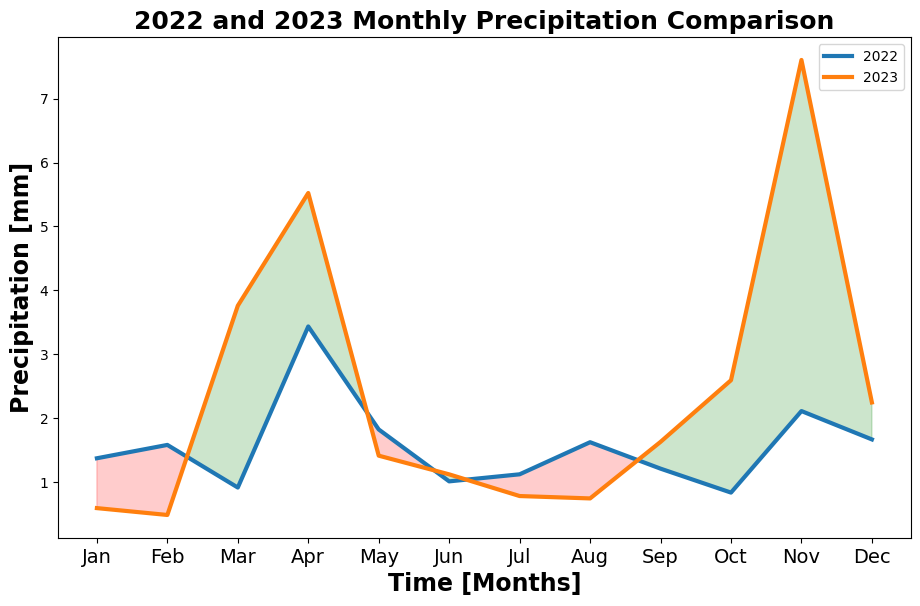

In [16]:
#mean and std of the monthly precipitation for 2023
month = Prec_mean.groupby('time.month').mean()
std = Prec_mean.groupby('time.month').std()
#mean and std of the monthly precipitation for 2022
month2 = Prec_mean2.groupby('time.month').mean()
std2 = Prec_mean2.groupby('time.month').std()
# Create a figure size
fig = plt.figure(figsize=(11, 6.5))
#data for plotting
x = month['month']
y = month
x2 = month2['month']
y2 = month2
# Plot the mean precipitation for the year 2022 and 2023
plt.plot(x2, y2, linewidth=3, label='2022')
plt.plot(x, y, linewidth=3, label='2023')
# Fill between the two lines to represent the difference in precipitation
plt.fill_between(x, y, y2, y - y2 > 0, interpolate=True, color='green', alpha=0.2)
plt.fill_between(x, y, y2, y - y2 < 0, interpolate=True, color='red', alpha=0.2)
# Setting x-ticks
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=np.arange(1, 13), labels=month_names, fontsize=14)
# plt.xticks(np.arange(min(x), max(x) + 1, 1.0))

# Set x-axis and y-axis label label with bold font and specified font size
plt.xlabel('Time [Months]', fontweight='bold', fontsize='17', horizontalalignment='center')
plt.ylabel('Precipitation [mm]', fontweight='bold', fontsize='17')
# Add legend
plt.legend()
# Set title of the plot
plt.title('2022 and 2023 Monthly Precipitation Comparison', fontweight='bold', fontsize='18')

# **Bar chart to visualize the time series of anomalies**

In [17]:
# Select years between 1991 and 2020
Prec_subset = Prec_yearly.where((Prec_yearly.year > 1990) & (Prec_yearly.year < 2021), drop=True)
#climatological mean
Prec_clim = Prec_subset.mean()
# Anomaly calculation
Prec_anom = Prec_yearly - Prec_clim

In [18]:
# Convert the xarray dataset to a pandas DataFrame
df = Prec_anom.to_dataframe()
#indicate whether the anomaly values are positive or not
df['positive'] = df['tp'] > 0

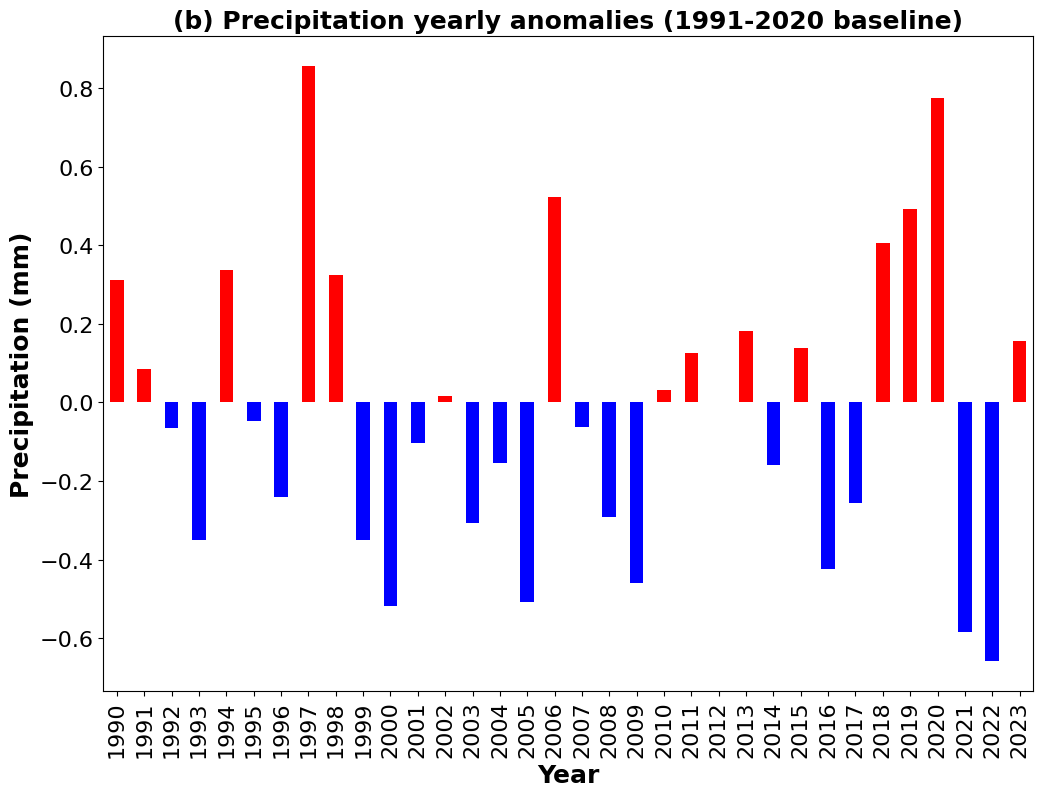

In [19]:
plt.rcParams.update({'font.size': 16})
figsize = (12, 8.5)

# Create a plot
df['tp'].plot(kind='bar', color=df.positive.map({True: 'red', False: 'blue'}), figsize=figsize)

# Set the labels and title with correct syntax
plt.xlabel('Year', fontsize=18, fontweight = 'bold')
plt.ylabel('Precipitation (mm)', fontsize=18, fontweight = 'bold')
plt.title('(b) Precipitation yearly anomalies (1991-2020 baseline)', fontsize=18, fontweight='bold')
# Display the plot
plt.show()

# **Heatmap plots**

In [20]:
#Load data
ERA5_prec = xr.open_dataset(r'//content/drive/My Drive/Ester AIMS/AIMS project/total_precipitation.nc')
# ERA5_prec

In [21]:
# Select year
ERA5_2022 = ERA5_prec.sel(time='2022')
#Convert m to mm
ERA5_2022 = ERA5_2022['tp']*1000
#Average tp for the year 2023
ERA5_2022_avg = ERA5_2022.mean(dim='time')

Text(0, 0.5, 'Precipitation (mm)')

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: 

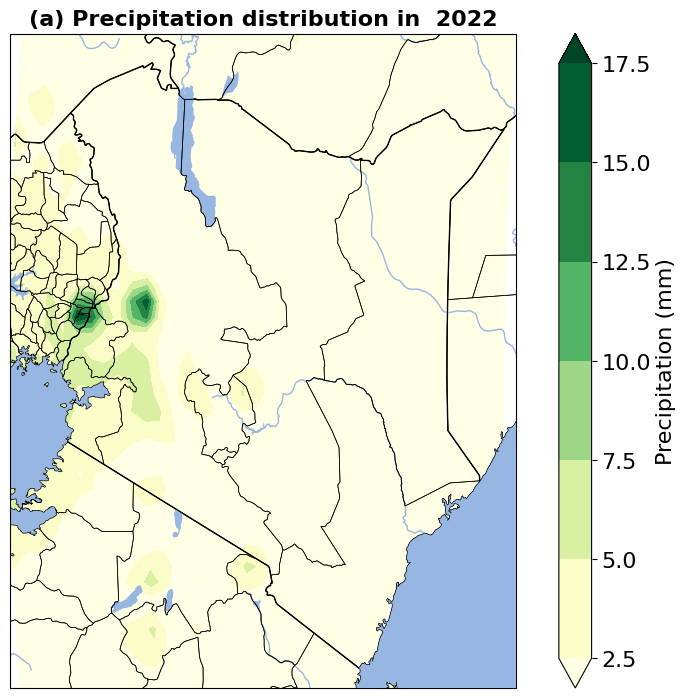

In [22]:
 # Create a figure with specified map projection
fig = plt.figure(figsize=(11, 8.5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))

# Add state boundaries with a width scale of 10m
ax.add_feature(cf.STATES.with_scale('10m'), zorder=3, linewidth=0.5)

# Make a filled contour plot
cs = ax.contourf(ERA5_2022_avg['longitude'], ERA5_2022_avg['latitude'], ERA5_2022_avg,
                 transform=ccrs.PlateCarree(), cmap='YlGn', extend='both')
# ax.set_extent([33, 45, -5, 6])
ax.set_extent([33, 42, -5, 5.5])
# Add coastlines, borders, ocean, lakes, rivers
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.OCEAN, zorder = 100)
ax.add_feature(cf.LAKES)
ax.add_feature(cf.RIVERS)
# ax.gridlines()

#title of the map
ax.set_title('(a) Precipitation distribution in  2022', fontsize=16, fontweight = 'bold')

# Add colorbar
cbar = plt.colorbar(cs, label='Precipitation (mm)')
cbar.ax.set_ylabel('Precipitation (mm)', fontsize=16)

In [23]:
# Select year
ERA5_2023 = ERA5_prec.sel(time='2023')
ERA5_2023 = ERA5_2023['tp']*1000

#Average tp for the year 2023
ERA5_2023_avg = ERA5_2023.mean(dim='time')

Text(0, 0.5, 'Precipitation (mm)')

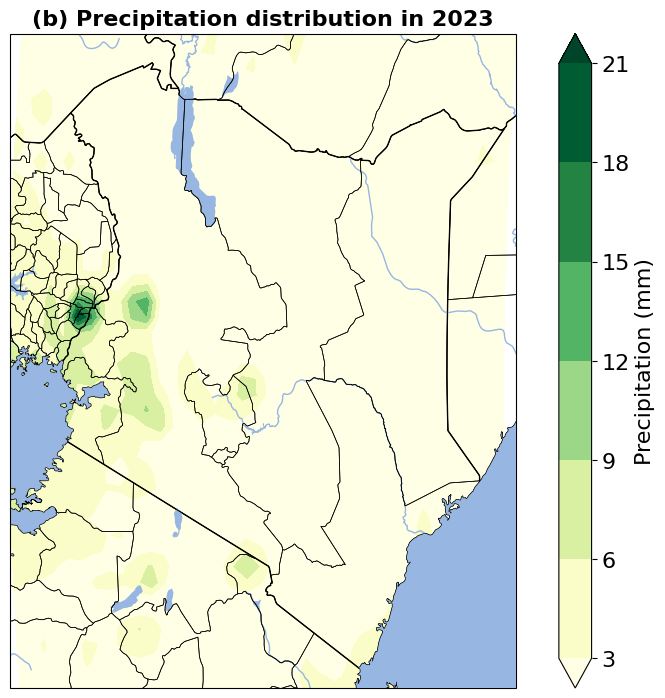

In [24]:
# Create a figure with specified map projection
fig = plt.figure(figsize=(11, 8.5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))

data = ERA5_2023_avg

# Add state boundaries with a width scale of 10m
ax.add_feature(cf.STATES.with_scale('10m'), zorder=3, linewidth=0.5)

# Make a filled contour plot
cs = ax.contourf(ERA5_2023_avg['longitude'], ERA5_2023_avg['latitude'], data,
                 transform=ccrs.PlateCarree(), cmap='YlGn', extend='both')
ax.set_extent([33, 42, -5, 5.5])
# Add coastlines, borders, ocean, lakes, rivers
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.OCEAN, zorder = 100)
ax.add_feature(cf.LAKES)
ax.add_feature(cf.RIVERS)
# ax.gridlines()

#title of the map
ax.set_title('(b) Precipitation distribution in 2023', fontsize=16, fontweight = 'bold')

# Add colorbar
cbar = plt.colorbar(cs, label='Precipitation (mm)')
cbar.ax.set_ylabel('Precipitation (mm)', fontsize=16)

# **Precipitation difference between 2022 and 2023**

In [25]:
#2023-2022 anomaly
diff_23_20 = ERA5_2023_avg - ERA5_2022_avg

Text(0, 0.5, 'Precipitation (mm)')

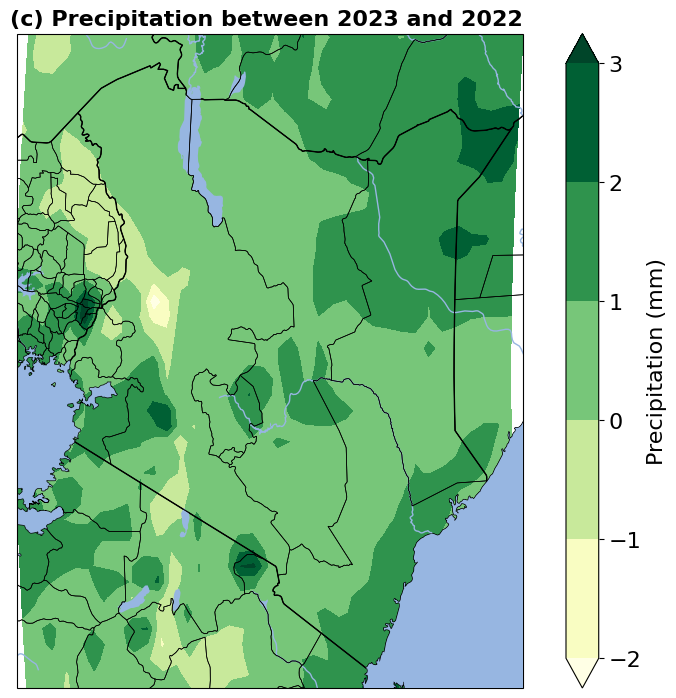

In [26]:
# Create a figure with specified map projection
fig = plt.figure(figsize=(11, 8.5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))

# Add state boundaries with a width scale of 10m
ax.add_feature(cf.STATES.with_scale('10m'), zorder=3, linewidth=0.5)

# Make a filled contour plot
cs = ax.contourf(diff_23_20['longitude'], diff_23_20['latitude'], diff_23_20,
                 transform=ccrs.PlateCarree(), cmap='YlGn', extend='both')
ax.set_extent([33, 42, -5, 5.5])
# Add coastlines, borders, ocean, lakes, rivers and gridline
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.OCEAN, zorder = 100)
ax.add_feature(cf.LAKES)
ax.add_feature(cf.RIVERS)
# ax.gridlines()

#title of the map
ax.set_title('(c) Precipitation between 2023 and 2022 ', fontsize=16, fontweight = 'bold')

# Add colorbar
cbar = plt.colorbar(cs, label='Precipitation (mm)')
cbar.ax.set_ylabel('Precipitation (mm)', fontsize=16)

# **2023 Precipitation anomalies**

In [27]:
#Select year, 1991 to 2020
ERA5_91_20 = ERA5_prec.sel(time =slice('1991','2020'))
#Convert m to mm
ERA5_91_20 = ERA5_91_20['tp']*1000
#Average tp for the year 2023
ERA5_91_20_avg = ERA5_91_20.mean(dim='time')

#2023 Anomaly
anom_2023 = ERA5_2023_avg - ERA5_91_20_avg

Text(0, 0.5, 'Precipitation (mm)')

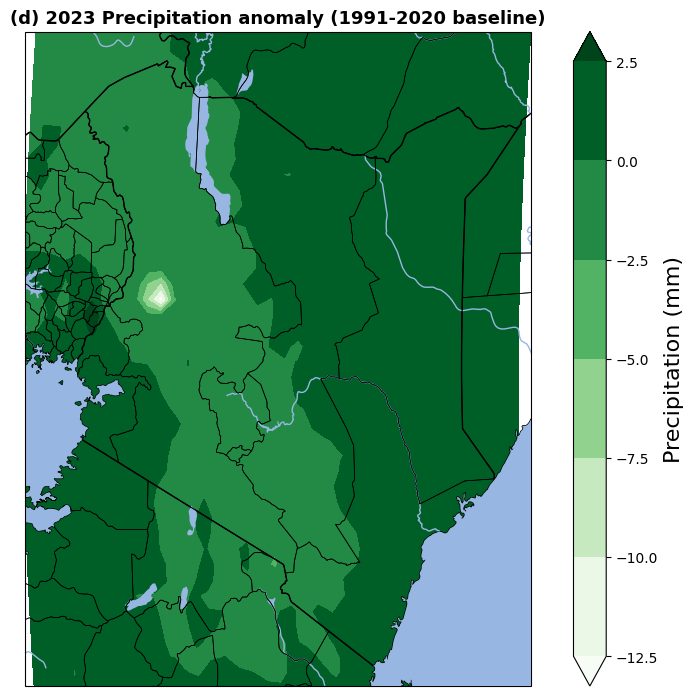

In [ ]:
# Create a figure with specified map projection
fig = plt.figure(figsize=(11, 8.5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))


# Add state boundaries with a width scale of 10m
ax.add_feature(cf.STATES.with_scale('10m'), zorder=3, linewidth=0.5)

# Make a filled contour plot
cs = ax.contourf(anom_2023['longitude'], anom_2023['latitude'], anom_2023,
                 transform=ccrs.PlateCarree(), cmap='Greens', extend='both')
ax.set_extent([33, 42, -5, 5.5])
# Add coastlines, borders, ocean, lakes, rivers and gridline
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.OCEAN, zorder = 100)
ax.add_feature(cf.LAKES)
ax.add_feature(cf.RIVERS)
# ax.gridlines()

#title of the map
ax.set_title('(d) 2023 Precipitation anomaly (1991-2020 baseline)', fontsize=13, fontweight = 'bold')

# Add colorbar
cbar = plt.colorbar(cs, label='Precipitation (mm)')
cbar.ax.set_ylabel('Precipitation (mm)', fontsize=16)